In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load Dataset From Sk

In [4]:
from sklearn.datasets import load_diabetes 
dia = load_diabetes() 

In [6]:
# Convert to DataFrame for better visualization
df = pd.DataFrame(dia.data, columns=dia.feature_names)
df.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930


In [ ]:
X = df[['age', 'bmi', 's2']]
y = df['s6']

In [9]:
df['target'] = dia.target
X = df.drop('target', axis=1) 
y = df['target']

## Splitting the Data into Training and Testing Sets:

In [18]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

## Fitting the Model and Making Predictions: 

In [19]:
model = LinearRegression() 
model.fit(X_train, y_train) 
y_pred = model.predict(X_test) 

## Evaluating the Model:

In [20]:
from sklearn.metrics import mean_squared_error, r2_score 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 
print(f"MSE: {mse}, R-squared: {r2}") 

MSE: 2821.750981001311, R-squared: 0.4772897164322617


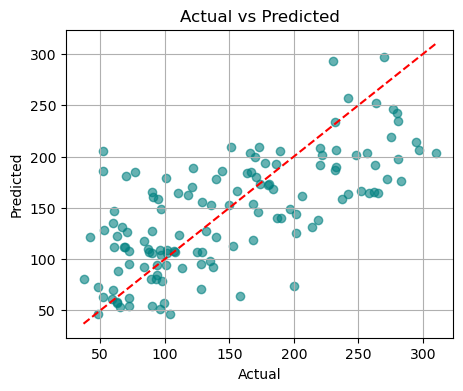

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
plt.scatter(y_test, y_pred, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

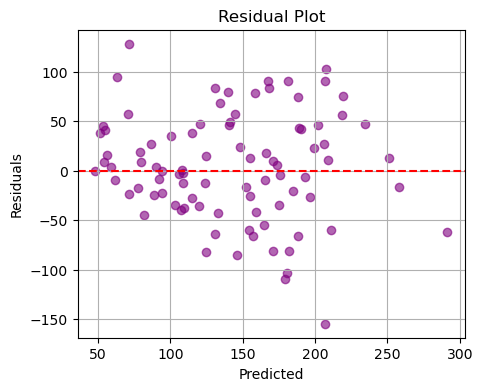

In [16]:
residuals = y_test - y_pred

plt.figure(figsize=(5,4))
plt.scatter(y_pred, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


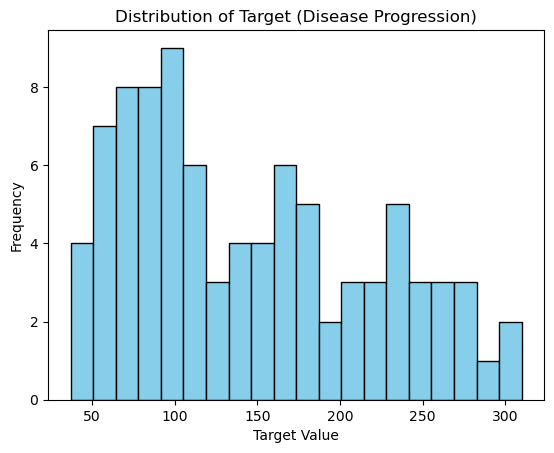

In [17]:
plt.hist(y_test, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Target (Disease Progression)')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.show()